<a href="https://colab.research.google.com/github/mridul-eecs/signal-processing-apachesparkml-apachesystemml/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Naive Bayes

In [4]:
!git clone https://github.com/mridul-eecs/signal-processing-apachesparkml-apachesystemml.git


Cloning into 'signal-processing-apachesparkml-apachesystemml'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 25 (delta 3), reused 17 (delta 2), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [0]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split

from math import sqrt
from math import pi
from math import exp

from sklearn.metrics import accuracy_score

In [5]:
import sys
import types
import pandas as pd
from botocore.client import Config
# import ibm_boto3

def __iter__(self): return 0

#
# INSERT YOUR CONNECTION TO gender_height_weight.csv HERE
# NAME THE RESULTING DATAFRAME dataDF
#
body= '/content/signal-processing-apachesparkml-apachesystemml/gender_height_weight.csv'
dataDF = pd.read_csv(body)
data = dataDF.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [6]:
data

array([[  1,  67, 150],
       [  0,  67, 140],
       [  1,  67, 100],
       ...,
       [  0,  75, 220],
       [  0,  76, 178],
       [  1,  67, 130]])

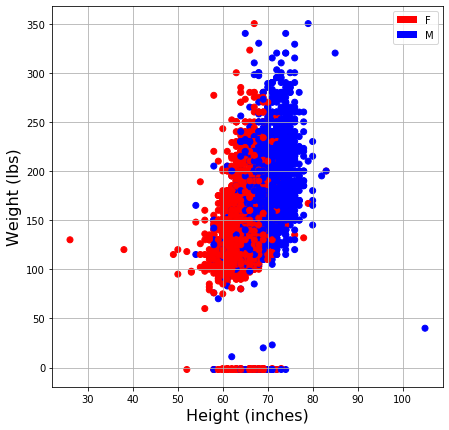

In [7]:
features = data[:,[1,2]]
labels = data[:,0]

f, ax1 = plt.subplots(1, 1, figsize=(7,7))

ax1.scatter(features[:,0], features[:,1], c=labels, cmap=plt.cm.bwr)        
ax1.grid(True)

plt.ylabel("Weight (lbs)", fontsize=16)
plt.xlabel("Height (inches)", fontsize=16)


recs = []
class_colours=["r","b"]
for i in range(2):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,["F","M"],loc=1)

In [0]:
features = data[:,[1,2]]
labels = data[:,0]

features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels, test_size=0.1,
                                                                            random_state = 100)

In [0]:
def getPriors(labels):
    priors = {}
    for className in labels:
        N = labels.size
        class_occurrence = (labels == className).sum()
        priors[className] = class_occurrence/N
    return priors

priors = getPriors(labels_train)

In [10]:
priors

{0: 0.5085022445925724, 1: 0.4914977554074276}

In [0]:
def fit(features, labels):
    uniqueClasses = np.unique(labels)
    coeffs = {}
    for className in uniqueClasses:
      featuresInClass = features[labels == className]
      statsInClass = [(np.mean(feature), np.std(feature)) for feature in zip(*featuresInClass)]            
      coeffs[className] = statsInClass    
    
    return coeffs

model = fit(features_train, labels_train)

In [12]:
model

{0: [(69.59657570893526, 3.3527911026371027),
  (163.66238630283573, 38.52142167903383)],
 1: [(64.43011347910324, 3.000581346637603),
  (132.66731248270136, 38.37250271665388)]}

In [0]:
def getLikelihood(x, featureIndex, model, className):
    classStats = model[className]
    mean = classStats[featureIndex][0]
    std  = classStats[featureIndex][1]
    f = (1/(sqrt(2*pi*pow(std,2))) * exp(-pow((x-mean),2)/(2*pow(std,2))))
    return f

def getPosterior(x, model, priors):
    posteriors = {}
    for className in priors:
        p = priors[className]
        for featureIndex in range(x.size):
            p = p * (getLikelihood (x[featureIndex], featureIndex, model, className))
        posteriors[className] = p
    return posteriors

In [0]:
x = np.array([59])

In [15]:
getLikelihood(x, 0, model, 0)

0.0008061935595272527

In [16]:
getLikelihood(x, 0, model, 1)

0.02585559243089853

In [0]:
def classify(x, model, priors):
    posteriors = getPosterior(x, model, priors)
    return max(posteriors, key=lambda key: posteriors[key])

predictions = [classify(x, model, priors) for x in features_test]

In [18]:
print("Prediction accuracy: %.2f\n" % accuracy_score(labels_test, predictions))

Prediction accuracy: 0.77

